In [1]:
import torchvision
import numpy as np
import Viz.Plots as plot
import Viz.Results as res

# Aufgabe 1

In [2]:
#load Train- and Test-Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Convert images and labels to NumPy arrays
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

## Train Dataset

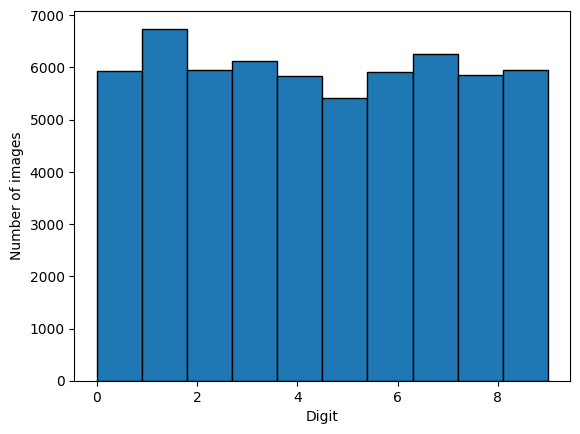

In [3]:
plot.show_hist(train_labels)

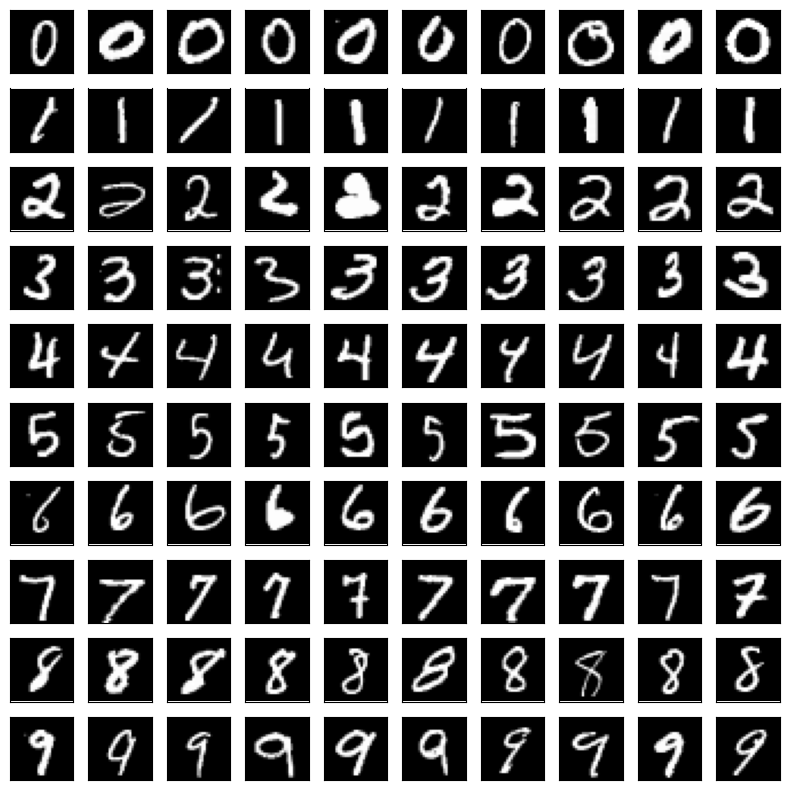

In [4]:
plot.show_image_matrix(train_images, train_labels)

## Test Dataset

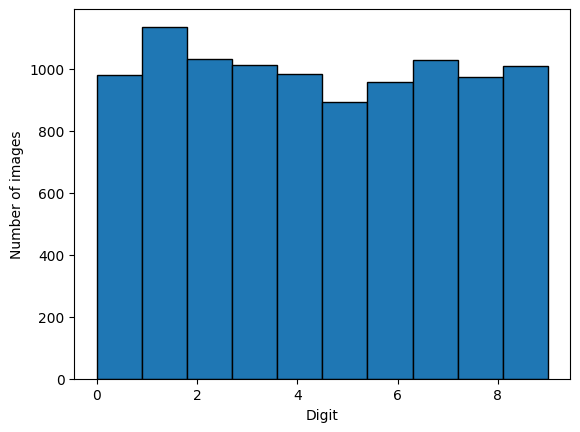

In [5]:
plot.show_hist(test_labels)

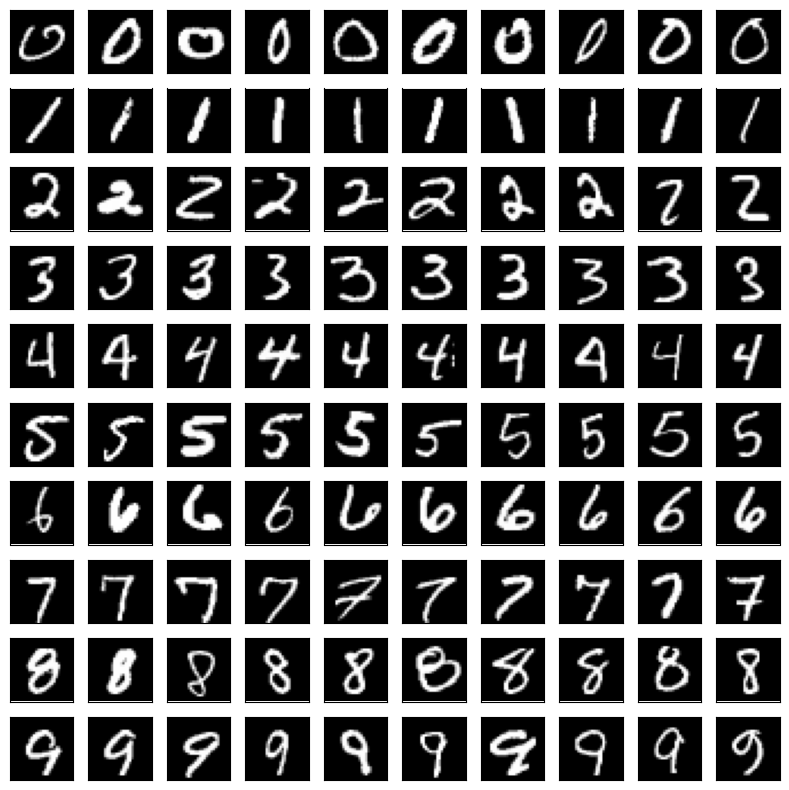

In [6]:
plot.show_image_matrix(test_images, test_labels)

# Aufgabe 2

## LinearLayer-Klasse

- **Zweck**: Stellt eine einzelne Schicht im Netzwerk dar, die fähig ist, lineare Transformationen durchzuführen und Parameter zu aktualisieren.
- **Schlüsselattribute**:
  - `weights`: Gewichtsmatrix, initialisiert mit der Xavier-Initialisierung.
  - `bias`: Bias-Vektor, initialisiert auf null.
  - `learning_rate`: Lernrate, die zur Aktualisierung der Parameter verwendet wird.
- **Schlüsselmethoden**:
  - `forward_pass(input_data)`: Berechnet die Ausgabe der Schicht, gegeben die Eingabedaten.
  - `backward_pass(input_data, output_gradient)`: Berechnet Gradienten, die für das Lernen benötigt werden.
  - `parameter_update(weight_gradient, bias_gradient)`: Aktualisiert die Gewichte und Biases der Schicht basierend auf Gradienten.

## Testfälle für die LinearLayer-Klasse

### Test des Forward-Passes

Die Funktion `test_forward_pass` testet die Forward-Pass-Berechnung der `LinearLayer`.

Gegeben:
- Eingabedaten: `[[1, 2], [3, 4]]`
- Gewichte: `[[0.1, 0.2], [0.3, 0.4]]`
- Bias: `[[0.5], [1.0]]`

Die erwartete Ausgabe `A_expected` wird wie folgt berechnet:

$$
A_{\text{expected}} = \text{Eingabe} \cdot \text{Gewichte}^T + \text{Bias}
$$

Durch manuelles Berechnen der Matrixoperationen:

$$
A_{\text{expected}} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \cdot \begin{bmatrix} 0.1 & 0.3 \\ 0.2 & 0.4 \end{bmatrix} + \begin{bmatrix} 0.5 \\ 1.0 \end{bmatrix} = \begin{bmatrix} 1.0 & 1.6 \\ 2.1 & 3.5 \end{bmatrix}
$$

Der Test bestätigt, dass die tatsächliche Ausgabe mit der erwarteten Ausgabe übereinstimmt.

### Test des Backward-Passes

Die Funktion `test_backward_pass` prüft den Backward-Pass der `LinearLayer`-Klasse, bei dem die Gradienten in Bezug auf die Eingaben und Parameter der Schicht berechnet werden. Dieser Test verwendet festgelegte Eingabedaten und vorgegebene Gewichte, um die Korrektheit der berechneten Gradienten zu überprüfen.

#### Gegeben

- **Eingabedaten**: `[[1, 2], [3, 4]]`
- **Gewichte**: `[[0.1, 0.2], [0.3, 0.4]]`
- **Bias**: `[0.5, 1.0]` (als 1D-Array angepasst, um dem Design der `LinearLayer`-Klasse zu entsprechen)
- **Ausgabegradient** (willkürlich für den Test): `[[0.5, 0.6], [0.7, 0.8]]`

#### Berechnung der erwarteten Gradienten

##### Eingabegradient (expected_dA)

Der Eingabegradient `expected_dA` wird als Produkt des Ausgabegradienten und der Gewichte berechnet:

$$
\text{expected\_dA} = \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \times \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}
$$

$$
\text{expected\_dA} = \begin{bmatrix} 0.23 & 0.34 \\ 0.31 & 0.46 \end{bmatrix}
$$

##### Gewichtegradient (expected_weight_gradient)

Der Gewichtegradient `expected_weight_gradient` wird als Produkt der transponierten Ausgabegradienten und des Eingabedaten berechnet:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 0.5 & 0.7 \\ 0.6 & 0.8 \end{bmatrix}^T \times \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
$$

Nach der Korrektur und Neuberechnung:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 2.6 & 3.8 \\ 3.0 & 4.4 \end{bmatrix}
$$

##### Biasgradient (expected_bias_gradient)

Der Biasgradient `expected_bias_gradient` wird als Summe der Zeilen des Ausgabegradienten berechnet:

$$
\text{expected\_bias\_gradient} = \sum \begin{bmatrix} 0.5 + 0.7 \\ 0.6 + 0.8 \end{bmatrix} = \begin{bmatrix} 1.2 \\ 1.4 \end{bmatrix}
$$

Der Test bestätigt, dass die tatsächliche Ausgabe mit der erwarteten Ausgabe übereinstimmt.

### Test der Parameteraktualisierung

Die Funktion `test_parameter_update` testet die Aktualisierung von Parametern mithilfe von Gradienten und einer Lernrate.

Gegeben:
- Anfängliche Gewichte: `[[0.5, 0.7], [0.3, 0.4]]`
- Anfänglicher Bias: `[[0.1], [0.2]]`
- Gewichtegradient: `[[-0.2, 0.1], [0.3, -0.1]]`
- Biasgradient: `[[-0.05], [0.03]]`
- Lernrate: `0.1`

Die erwarteten aktualisierten Gewichte und Bias werden wie folgt berechnet:

$$
\text{Erwartete Gewichte} = \text{Anfängliche Gewichte} - \text{Lernrate} \times \text{Gewichtegradient}
$$
$$
\text{Erwarteter Bias} = \text{Anfänglicher Bias} - \text{Lernrate} \times \text{Biasgradient}
$$

Durch manuelle Anwendung der Aktualisierungsregel:

$$
\text{Erwartete Gewichte} = \begin{bmatrix} 0.5 & 0.7 \\ 0.3 & 0.4 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.2 & 0.1 \\ 0.3 & -0.1 \end{bmatrix}
$$
$$
\text{Erwarteter Bias} = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.05 \\ 0.03 \end{bmatrix}
$$

Der Test bestätigt, dass die Funktion zur Parameteraktualisierung die Gewichte und den Bias entsprechend den Gradienten und der Lernrate korrekt anpasst.



# Aufgabe 3

### NeuralNetwork-Klasse

- **Zweck**: Verwaltet die gesamte Netzwerkarchitektur einschließlich mehrerer Schichten sowie Vorwärts- und Rückwärtspropagation.
- **Schlüsselattribute**:
  - `input_dim`: Größe der Eingabedaten.
  - `hidden_dim`: Größe jeder versteckten Schicht.
  - `output_dim`: Größe der Ausgabeschicht.
  - `learning_rate`: Lernrate für das Training des Netzwerks.
  - `hidden_layers`: Eine Liste von `LinearLayer`-Instanzen, die die versteckten Schichten darstellen.
  - `output_layer`: Eine einzelne `LinearLayer`-Instanz, die als Ausgabeschicht dient.
- **Schlüsselmethoden**:
  - `forward_pass(input_data)`: Verarbeitet die Eingabe durch das Netzwerk und gibt die Ausgabe zurück.
  - `backward_pass(input_data, output_gradient)`: Leitet Fehler zurück durch das Netzwerk, um Gewichte zu aktualisieren.
  - `parameter_update(gradients, output_gradients)`: Wendet berechnete Gradienten an, um die Parameter des Netzwerks zu aktualisieren.


### Funktionsbeschreibung

- Die Klasse `NeuralNetwork` konstruiert eine Reihe von linearen Schichten und verwaltet den Datenfluss durch diese Schichten während der Vorwärts- und Rückwärtsdurchläufe.
- Jede `LinearLayer` ist verantwortlich für eine einzelne lineare Transformation: Berechnung gewichteter Eingaben plus Biases und anschließende Aktualisierung dieser Parameter während des Trainings.
- Aktivierungsfunktionen wie Sigmoid oder Softmax werden extern auf die Schichten angewendet, was Flexibilität im Netzwerkdesign und in der Funktionalität ermöglicht.

In [7]:
# Normalize images
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# Convert labels for binary classification (1 for digit 5, 0 for all other digits)
digit = 5
binary_train_labels = (train_labels == digit).astype(np.float32).reshape(-1, 1)
binary_test_labels = (test_labels == digit).astype(np.float32).reshape(-1, 1)

# Flatten the images for simplicity (28x28 to 784)
binary_train_images = train_images.reshape(train_images.shape[0], -1)
binary_test_images = test_images.reshape(test_images.shape[0], -1)

## Trainingsmodell für binäre Klassifikation

### Modellstruktur und -training
- **Mini-Batch Gradientenabstieg**: Das Modell verwendet Mini-Batch Gradientenabstieg zur Optimierung. Dabei wird der Datensatz in kleinere Chargen (Batches) aufgeteilt, um den Gradienten effizienter zu berechnen und zu aktualisieren.
- **Durchmischung der Trainingsdaten**: Vor jedem Durchlauf (Epoch) werden die Trainingsdaten zufällig neu angeordnet, um die Reihenfolgeabhängigkeit zu minimieren und das Überlernen zu verhindern.

### Vorwärts- und Rückwärtsdurchlauf
- **Vorwärtsdurchlauf (Forward Pass)**: Das Modell berechnet die Vorhersagen basierend auf den aktuellen Gewichtungen.
- **Rückwärtsdurchlauf (Backward Pass)**: Nach der Berechnung der Vorhersagen wird der Fehler ermittelt und der Gradient der Verlustfunktion bezüglich der Parameter des Modells berechnet.

### Parameteraktualisierung
- **Aktualisierung der Parameter**: Die Parameter des Modells werden basierend auf den berechneten Gradienten aktualisiert, um die Leistung des Modells schrittweise zu verbessern.

### Leistungsbewertung
- **Bewertung des Modells**: Nach jedem Epoch wird das Modell sowohl mit den Trainingsdaten als auch mit den Testdaten bewertet, um den Verlust und die Genauigkeit zu ermitteln. Diese Metriken helfen dabei, die Leistung des Modells über die Zeit zu überwachen und zu verstehen.

## Zusatzinformationen
- Das Modell setzt voraus, dass Funktionen zur Berechnung des binären Kreuzentropieverlusts (`binary_cross_entropy`) und der Genauigkeit (`binary_compute_accuracy`) bereits implementiert sind.
- Diese Struktur ist typisch für maschinelles Lernen bei Aufgaben zur binären Klassifikation und hilft, das Verhalten und die Anpassung des Modells im Laufe der Zeit zu verstehen und zu optimieren.

## Kostenfunktion (Loss Function)

Für binäre Klassifikationsaufgaben ist die binäre Kreuzentropie (Binary Cross-Entropy, BCE) eine häufig verwendete Kostenfunktion. Sie ist definiert als:

$$
BCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$

Hierbei ist:
- $N$ die Anzahl der Beispiele im Datensatz,
- $y_i$ der tatsächliche Labelwert (0 oder 1) und
- $\hat{y}_i$ der vom Netzwerk vorhergesagte Wert.

Diese Funktion ist besonders geeignet, weil sie die Wahrscheinlichkeit, die durch die Sigmoid-Aktivierungsfunktion des Output-Knotens modelliert wird, direkt berücksichtigt und Strafen für falsche Klassifikationen auf eine Art und Weise anwendet, die gut mit dem Optimierungsprozess zusammenarbeitet.



## Evaluationsfunktion

Für die Bewertung der Modellleistung bei binärer Klassifikation ist die Genauigkeit (Accuracy) eine intuitive Metrik:

$$
\text{Accuracy} = \frac{\text{Anzahl der korrekt klassifizierten Beispiele}}{\text{Gesamtanzahl der Beispiele}}
$$

Diese Metrik ist einfach zu verstehen und gibt den Anteil der korrekt vorhergesagten Beispiele an der Gesamtzahl der Beispiele an.


## Alternative Optionen
### Evaluierungsmetriken:

- **Precision und Recall**: Precision misst das Verhältnis der korrekt positiv klassifizierten Instanzen zur Gesamtzahl der positiven Klassifizierungen, während Recall das Verhältnis der korrekt positiv klassifizierten Instanzen zur Gesamtzahl der tatsächlich positiven Instanzen misst. Diese Metriken sind besonders wichtig, wenn die Klassen im Datensatz stark unbalanciert sind.

- **F1-Score**: Der F1-Score kombiniert Precision und Recall zu einer einzigen Metrik und bietet somit ein ausgewogenes Maß für die Modellleistung, insbesondere wenn Precision und Recall in Konflikt stehen.

- **Kappa-Metrik**: Diese Metrik bewertet die Übereinstimmung zwischen zwei Klassifikatoren, was nützlich ist, wenn mehrere Modelle verglichen werden sollen oder wenn die Leistung eines Modells im Vergleich zu einer zufälligen Klassifikation bewertet werden soll.

- **AUC-ROC-Kurve**: Die Fläche unter der ROC-Kurve (AUC-ROC) misst die Leistungsfähigkeit des Modells, Sensitivität und Spezifität zu kompromittieren. Dies ist besonders nützlich, wenn Sie die Leistung des Modells über verschiedene Schwellenwerte betrachten möchten.

### Loss-Funktionen mit Kostenbezug:

- **Kostenmatrix**: Diese Matrix ermöglicht es, unterschiedliche Kosten für falsch positive und falsch negative Vorhersagen zu berücksichtigen, was besonders wichtig ist, wenn asymmetrische Kosten vorliegen oder wenn das Ziel ist, die Kosten bestimmter Fehler zu minimieren.

Indem man mehrere Metriken betrachtet, kann man ein umfassenderes Bild von der Leistung des Modells erhalten und besser entscheiden, welches Modell für die spezifische Aufgabe am besten geeignet ist.


## Aufgabe 4

### Bedeutung der Hyperparameter-Evaluation

Die systematische Evaluation von Hyperparametern wie der Lernrate (`lr`) und der Größe der versteckten Schicht (`hidden_size`) ist entscheidend für die Optimierung der Leistung eines neuronalen Netzwerks. 

Dieser Prozess ermöglicht es uns, empirisch zu bestimmen, welche Kombination dieser Parameter die beste Balance zwischen Lerneffizienz und Generalisierung bietet. Dies ist wichtig, um die Genauigkeit auf unbekannten Daten zu maximieren.

Durch das Testen verschiedener Konfigurationen können wir die Architektur des neuronalen Netzwerks feinjustieren. Dies passt das Modell optimal an die spezifischen Anforderungen der Aufgabe und die Struktur des Datensatzes an. Dadurch wird Overfitting vermieden und die Zuverlässigkeit des Modells verbessert.

In [8]:
import Train_Models.Binary_Train as bt

In [9]:
epochs = 20
batch_size = 64  # Example batch size
learning_rates = [0.01, 0.1, 1]
hidden_layer_sizes = [4, 8, 16]

# Call the function to evaluate all combinations
binary_evaluation_results = bt.binary_evaluate_combinations(
    binary_train_images, binary_train_labels, binary_test_images, binary_test_labels, epochs, batch_size, learning_rates, hidden_layer_sizes
)

Evaluating model with learning rate 0.01 and hidden layer size 4
Epoch 1, Train Loss: 0.07457249017216713, Test Loss: 0.07032574242983594, Train Accuracy: 0.9758666666666667, Test Accuracy: 0.9776
Epoch 2, Train Loss: 0.054822653462405696, Test Loss: 0.05366844921309428, Train Accuracy: 0.98195, Test Accuracy: 0.9817
Epoch 3, Train Loss: 0.04395339184780155, Test Loss: 0.04393794699559353, Train Accuracy: 0.9861166666666666, Test Accuracy: 0.9849
Epoch 4, Train Loss: 0.040289565648472574, Test Loss: 0.042568462768524225, Train Accuracy: 0.9866666666666667, Test Accuracy: 0.9845
Epoch 5, Train Loss: 0.03632876726159017, Test Loss: 0.04047461853470393, Train Accuracy: 0.9879166666666667, Test Accuracy: 0.9857
Epoch 6, Train Loss: 0.03514838785506334, Test Loss: 0.04075345375741489, Train Accuracy: 0.9881833333333333, Test Accuracy: 0.9858
Epoch 7, Train Loss: 0.042128530217514185, Test Loss: 0.04964227444094855, Train Accuracy: 0.9853, Test Accuracy: 0.9822
Epoch 8, Train Loss: 0.0320988

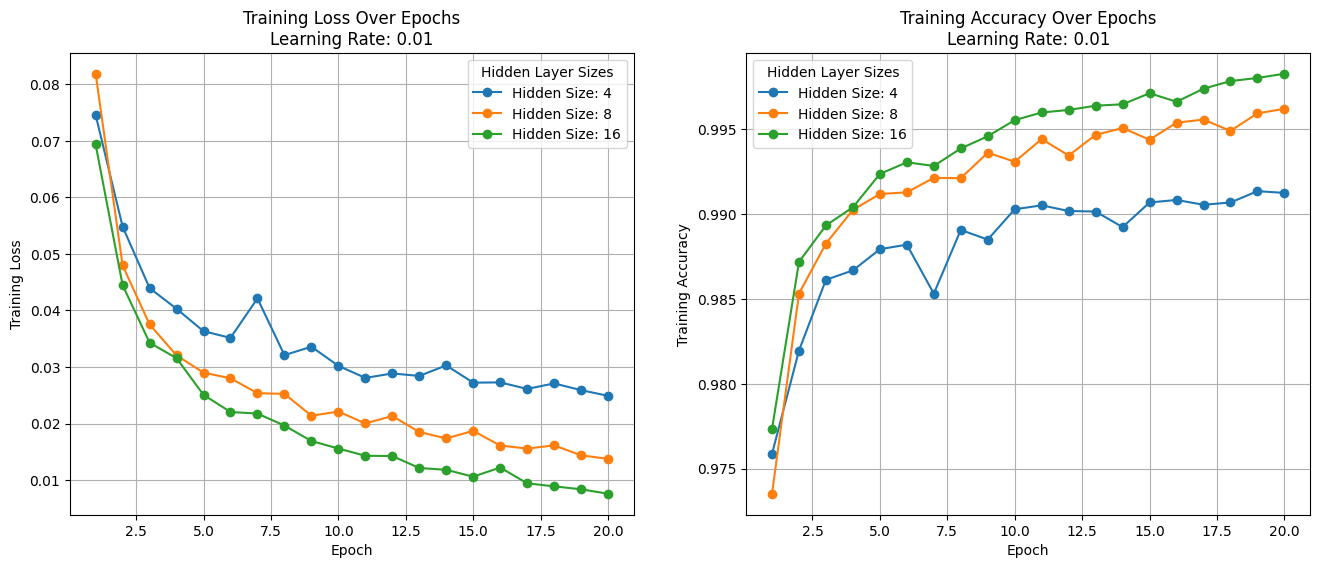

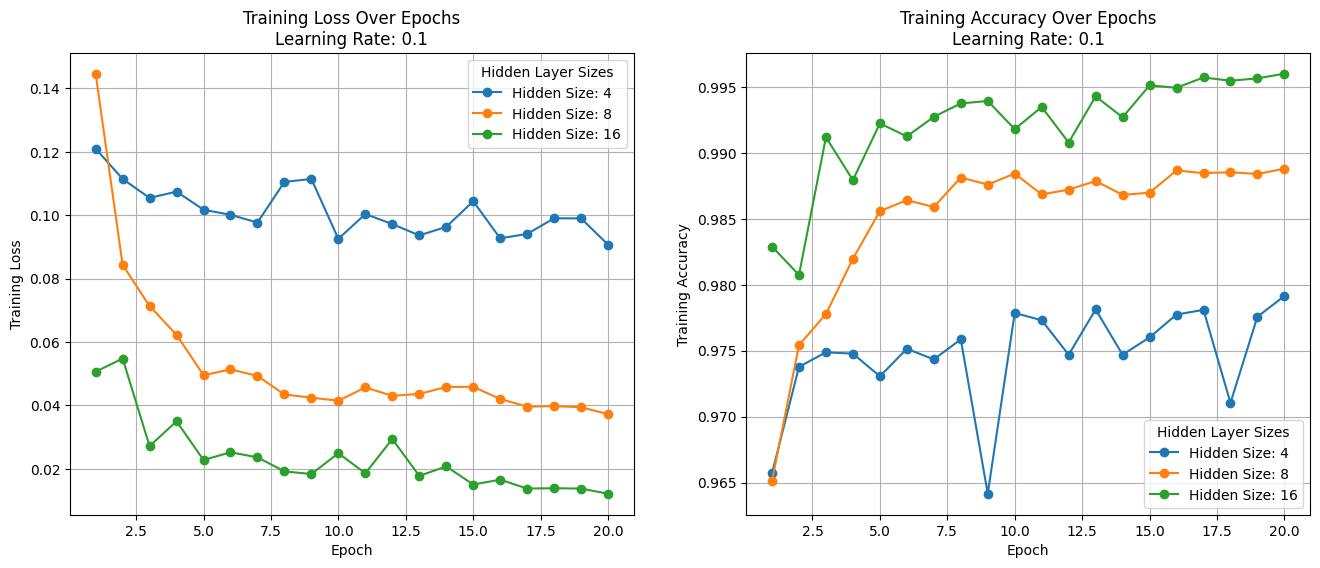

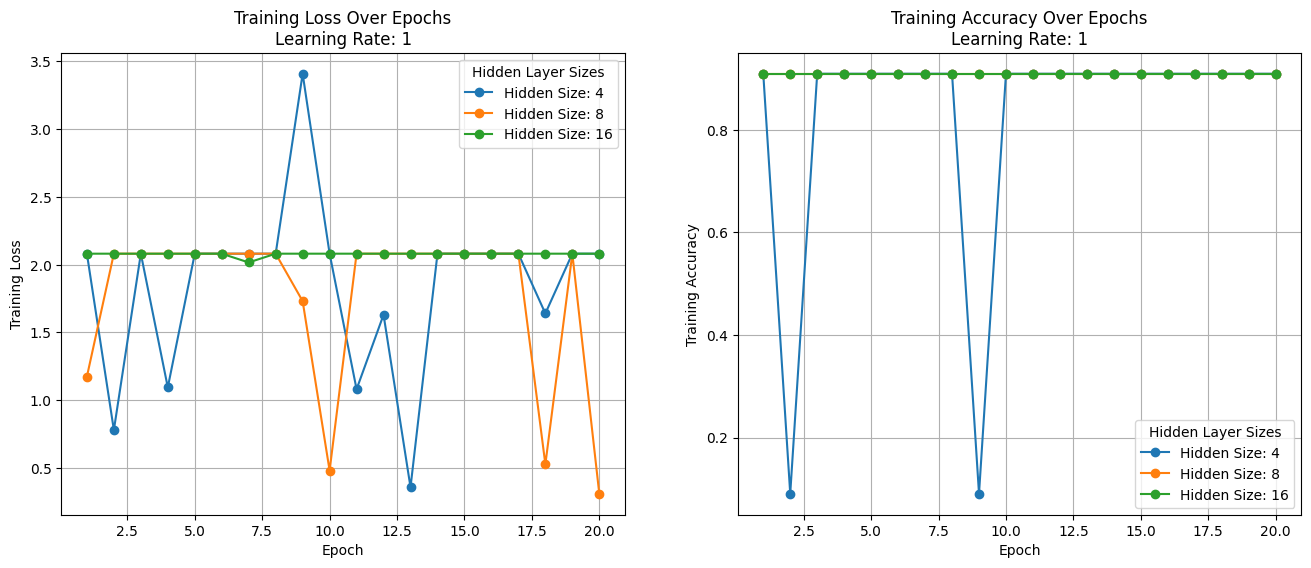

In [10]:
plot.show_evaluation_results(binary_evaluation_results)

## Zusammenfassung der Modellkonfigurationen und Leistung

### Beobachtungen:

1. **Lernrate und Leistung:**
   - Niedrigere Lernraten (0.01) führen zu besseren Ergebnissen bei Trainingsverlust und Genauigkeit.
   - Höhere Lernraten (0.1 und 1) resultieren in höheren Verlusten und geringerer Genauigkeit.

2. **Einfluss der Größe der versteckten Schicht:**
   - Größere versteckte Schichten (16 Neuronen) erzielen bei einer Lernrate von 0.01 die besten Ergebnisse.
   - Bei einer Lernrate von 1 zeigt die Größe der versteckten Schicht keinen signifikanten Einfluss auf die Leistung.

In [11]:
res.rank_results(binary_evaluation_results)

## Ranked Results

**Rank 1:** Learning Rate = 0.01, Hidden Layer Size = 16, Train Loss = 0.008, Train Accuracy = 99.83%

**Rank 2:** Learning Rate = 0.1, Hidden Layer Size = 16, Train Loss = 0.012, Train Accuracy = 99.60%

**Rank 3:** Learning Rate = 0.01, Hidden Layer Size = 8, Train Loss = 0.014, Train Accuracy = 99.62%

**Rank 4:** Learning Rate = 0.01, Hidden Layer Size = 4, Train Loss = 0.025, Train Accuracy = 99.12%

**Rank 5:** Learning Rate = 0.1, Hidden Layer Size = 8, Train Loss = 0.037, Train Accuracy = 98.88%

**Rank 6:** Learning Rate = 0.1, Hidden Layer Size = 4, Train Loss = 0.091, Train Accuracy = 97.91%

**Rank 7:** Learning Rate = 1, Hidden Layer Size = 8, Train Loss = 0.313, Train Accuracy = 90.96%

**Rank 8:** Learning Rate = 1, Hidden Layer Size = 4, Train Loss = 2.080, Train Accuracy = 90.96%

**Rank 9:** Learning Rate = 1, Hidden Layer Size = 16, Train Loss = 2.080, Train Accuracy = 90.96%


## Aufgabe 5

## Trainingsmodell für kategoriale Klassifikation

### Modellstruktur und -training
- **Mini-Batch Gradientenabstieg**: Optimiert das Modell durch Verarbeitung der Trainingsdaten in kleinen Chargen. Diese Methode verbessert die Effizienz und die Konvergenz des Gradientenabstiegs.
- **Durchmischung der Trainingsdaten**: Zu Beginn jedes Durchlaufs (Epoch) werden die Trainingsdaten zufällig neu gemischt, um die Abhängigkeit von der Reihenfolge der Daten zu vermeiden und das allgemeine Lernen zu verbessern.

### Vorwärts- und Rückwärtsdurchlauf
- **Vorwärtsdurchlauf (Forward Pass)**: Das Modell berechnet die Vorhersagen aus den Eingangsdaten.
- **Rückwärtsdurchlauf (Backward Pass)**: Nach der Vorhersage werden Fehler berechnet und Gradienten der Parameter durch Backpropagation ermittelt.

### Parameteraktualisierung
- **Aktualisierung der Parameter**: Nach der Berechnung der Gradienten werden die Parameter des Modells (Gewichte und Biases) aktualisiert, um die Genauigkeit des Modells zu verbessern.

### Leistungsbewertung
- **Evaluation des Modells**: Nach jedem Durchlauf wird das Modell mit den gesamten Trainings- und Testdaten bewertet. Diese Bewertung umfasst den Verlust (Softmax-Kreuzentropie) und die Genauigkeit (kategoriale Genauigkeit), welche Aufschluss über die Leistung des Modells geben.

## Zusatzinformationen
- Funktionen für die Berechnung des Softmax-Kreuzentropieverlusts (`softmax_cross_entropy`) und der kategorialen Genauigkeit (`categorical_compute_accuracy`) sind notwendig.
- Diese Trainingsstruktur ist typisch für maschinelles Lernen bei kategorialen Klassifikationsaufgaben und unterstützt das Verständnis und die Optimierung des Modellverhaltens über die Zeit.



# Kostenfunktion (Loss Function)

Bei der Multi-Klassen-Klassifikation, bei der es mehr als zwei mögliche Klassenbezeichnungen gibt, ist die binäre Kreuzentropie (BCE) nicht mehr geeignet. Hier wird üblicherweise die Softmax-Cross-Entropie (SCE)-Verlustfunktion verwendet. Sie erweitert das Konzept der BCE für mehrere Klassen:

$$
SCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \cdot \log(\hat{y}_{i,c})
$$

Wobei:
- **N** die Anzahl der Beispiele im Datensatz ist,
- **C** die Anzahl der Klassen ist,
- **$y_{i,c}$** die One-Hot-Enkodierte Bezeichnung für Klasse c in Beispiel i ist (1 für die wahre Klasse, 0 für andere), und
- **$\hat{y}_{i,c}$** die vom Netzwerk vorhergesagte Wahrscheinlichkeit für Klasse c in Beispiel i ist (Ausgabe der Softmax-Aktivierungsfunktion).

SCE misst die Differenz zwischen den echten One-Hot-Enkodierten Bezeichnungen und der vorhergesagten Wahrscheinlichkeitsverteilung für jedes Beispiel. Die Minimierung dieses Verlusts führt dazu, dass das Modell den korrekten Klassen höhere Wahrscheinlichkeiten zuweist.

## Evaluationsfunktion

Die Funktion `categorical_compute_accuracy` berechnet die Genauigkeit (Accuracy) für kategoriale Klassifikation.

**Eingabe:**
- `predictions`: Ein $m \times n$ Matrix von Vorhersagewahrscheinlichkeiten.
- `labels`: Ein $m \times n$ Matrix von tatsächlichen Labels, one-hot encoded.

**Operationen:**
1. Konvertiere `predictions` und `labels` zu Vektoren der vorhergesagten bzw. tatsächlichen Klassen durch die Auswahl des Indexes mit der maximalen Wahrscheinlichkeit:
   
   $$
   \text{predicted\_class}_i = \underset{j}{\mathrm{argmax}}\ (\textit{predictions}_{ij})
   $$
   
   $$
   \text{actual\_class}_i = \underset{j}{\mathrm{argmax}}\ (\textit{labels}_{ij})
   $$
   
   wobei $i$ das Beispiel und $j$ die Klasse indiziert.

2. Berechne die Genauigkeit als den Durchschnitt der korrekt klassifizierten Beispiele:
   
   $$
   \text{Accuracy} = \frac{1}{m} \sum_{i=1}^{m} \mathbb{1}(\text{predicted\_class}_i = \text{actual\_class}_i)
   $$
   
   wobei $\mathbb{1}$ die Indikatorfunktion ist, die 1 zurückgibt, wenn die vorhergesagte Klasse mit der tatsächlichen Klasse übereinstimmt, andernfalls 0.

## Alternative Optionen

### Evaluierungsmetriken:

- **Kategorische Genauigkeit (Categorical Accuracy)**:
  - Diese Metrik misst den Anteil der korrekt klassifizierten Beispiele im Verhältnis zur Gesamtzahl der Beispiele.
  - Berechnung:
    $$
    \text{Categorical Accuracy} = \frac{1}{m} \sum_{i=1}^{m} \mathbb{1}(\text{predicted\_class}_i = \text{actual\_class}_i)
    $$
  - Hierbei sind $\text{predicted\_class}_i$ und $\text{actual\_class}_i$ die vorhergesagte bzw. tatsächliche Klasse des Beispiels $i$.

### Loss-Funktionen:

- **Kategorische Kreuzentropie (Categorical Cross-Entropy)**:
  - Diese Loss-Funktion eignet sich für die kategorische Klassifikation, wenn Ihre Labels direkt als Indizes vorliegen.
  - Berechnung:
    $$
    CCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \log(\hat{y}_{i,\text{true}})
    $$
  - Wobei $\hat{y}_{i,\text{true}}$ die vom Netzwerk vorhergesagte Wahrscheinlichkeit für die tatsächliche Klasse des Beispiels $i$ ist.

Die Verwendung dieser alternativen Metriken und Loss-Funktionen ermöglicht es Ihnen, die Leistung Ihres Modells in kategorischen Klassifikationsaufgaben effektiv zu bewerten und zu optimieren.


In [12]:
import Train_Models.Categorial_Train as ct

In [13]:
def one_hot_encode(labels, num_classes=None):
    if num_classes is None:
        num_classes = labels.max() + 1
    return np.eye(num_classes)[labels]

In [14]:
categorical_train_labels = one_hot_encode(train_labels)
categorical_test_labels = one_hot_encode(test_labels)

# Flatten the images for simplicity (28x28 to 784)
categorical_train_images = train_images.reshape(train_images.shape[0], -1)
categorical_test_images = test_images.reshape(test_images.shape[0], -1)

In [15]:
epochs = 20
batch_size = 64  # Example batch size
learning_rates = [0.01, 0.1, 1]
hidden_layer_sizes = [4, 8, 16]

# Call the function to evaluate all combinations
categorical_evaluation_results = ct.categorical_evaluate_combinations(
    categorical_train_images, categorical_train_labels, categorical_test_images, categorical_test_labels, epochs, batch_size, learning_rates, hidden_layer_sizes
)

Evaluating model with learning rate 0.01 and hidden layer size 4
Epoch 1, Train Loss: 2.0402761652414334, Test Loss: 2.037574204831842, Train Accuracy: 0.6197666666666667, Test Accuracy: 0.625
Epoch 2, Train Loss: 1.8765867673258119, Test Loss: 1.8723251809704895, Train Accuracy: 0.7062666666666667, Test Accuracy: 0.7093
Epoch 3, Train Loss: 1.8209683261177458, Test Loss: 1.818334034546635, Train Accuracy: 0.7707333333333334, Test Accuracy: 0.7692
Epoch 4, Train Loss: 1.772344283877778, Test Loss: 1.7713989051472738, Train Accuracy: 0.8054, Test Accuracy: 0.8066
Epoch 5, Train Loss: 1.742909601948045, Test Loss: 1.744887878470428, Train Accuracy: 0.8181333333333334, Test Accuracy: 0.8144
Epoch 6, Train Loss: 1.7363274058394862, Test Loss: 1.7389693052881356, Train Accuracy: 0.8177, Test Accuracy: 0.8119
Epoch 7, Train Loss: 1.7226021563375375, Test Loss: 1.7278264144238944, Train Accuracy: 0.8257, Test Accuracy: 0.8172
Epoch 8, Train Loss: 1.7044891021127273, Test Loss: 1.7102735187487

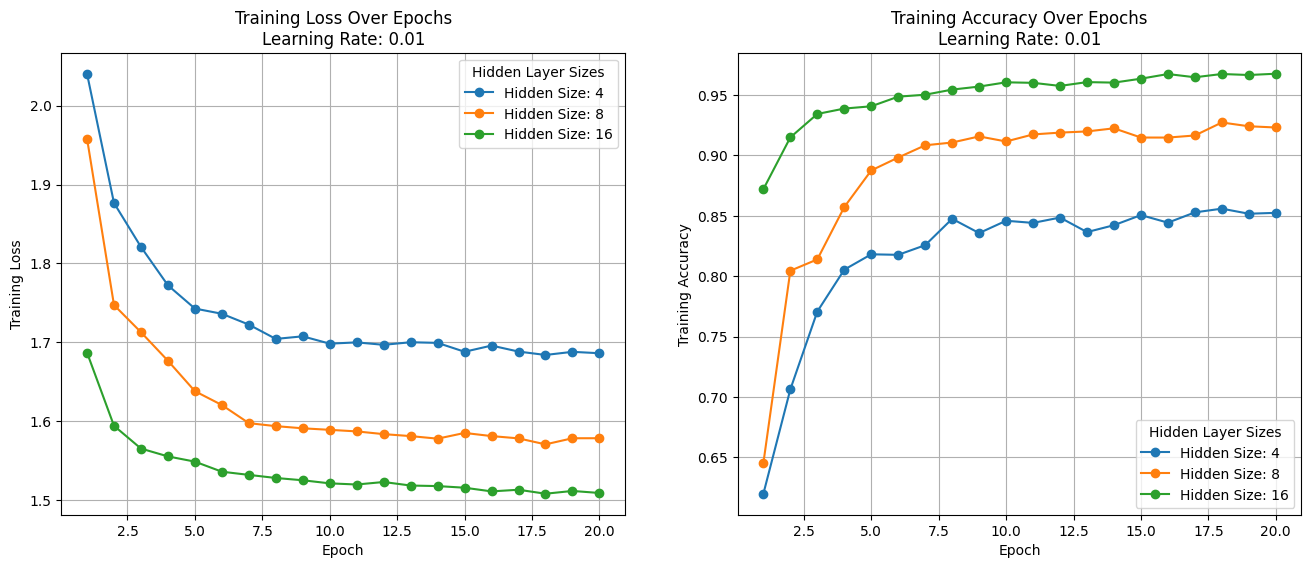

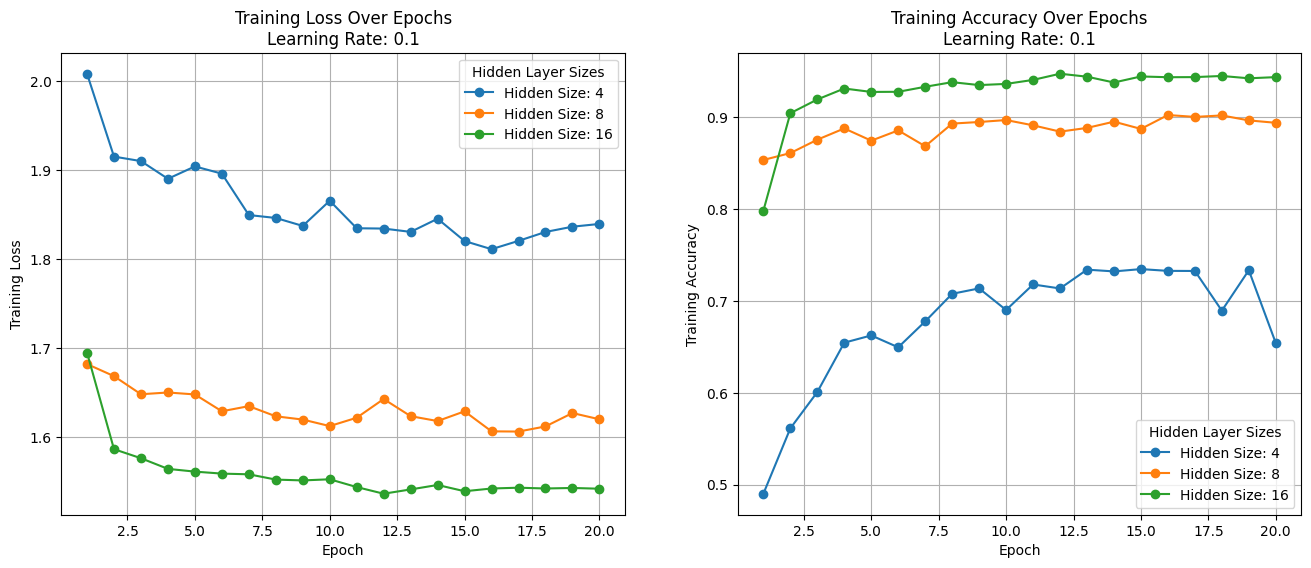

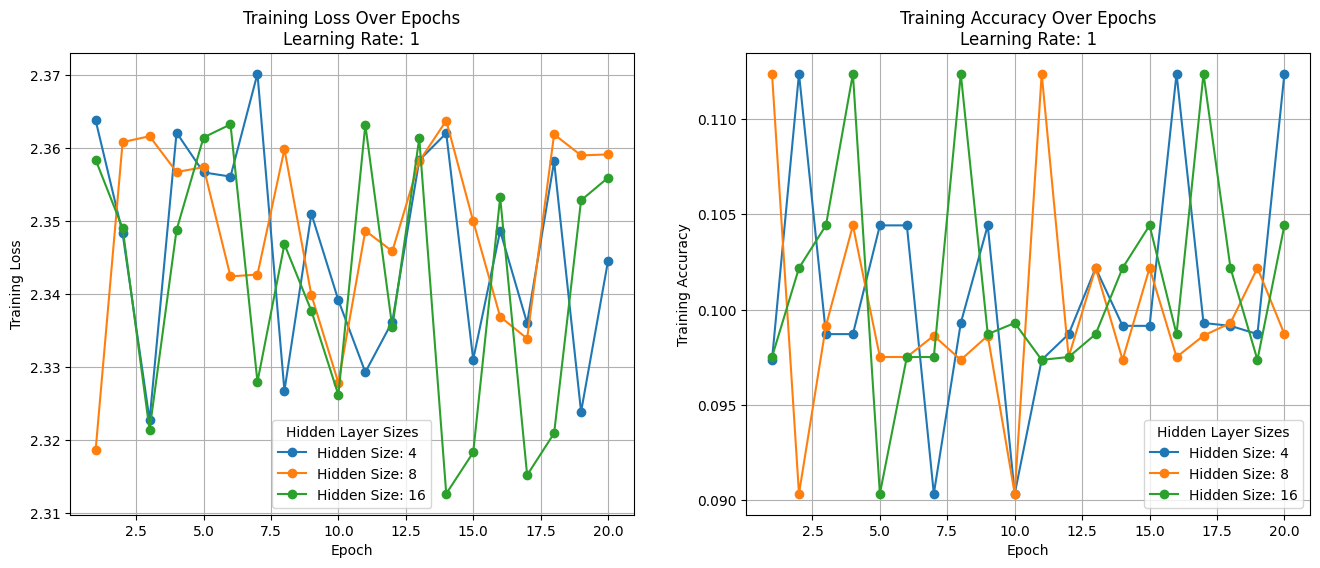

In [16]:
plot.show_evaluation_results(categorical_evaluation_results)

## Zusammenfassung der Modellkonfigurationen und Leistung

### Beobachtungen:

1. **Lernrate und Leistung:**
   - Niedrigere Lernraten (0.01) führen zu besseren Ergebnissen bei Trainingsverlust und Genauigkeit.
   - Höhere Lernraten (0.1 und 1) resultieren in höheren Verlusten und geringerer Genauigkeit.

2. **Einfluss der Größe der versteckten Schicht:**
   - Größere versteckte Schichten (16 Neuronen) erzielen bei einer Lernrate von 0.01 die besten Ergebnisse.
   - Bei einer Lernrate von 1 zeigt die Größe der versteckten Schicht keinen signifikanten Einfluss auf die Leistung.

In [17]:
res.rank_results(categorical_evaluation_results)

## Ranked Results

**Rank 1:** Learning Rate = 0.01, Hidden Layer Size = 16, Train Loss = 1.509, Train Accuracy = 96.78%

**Rank 2:** Learning Rate = 0.1, Hidden Layer Size = 16, Train Loss = 1.542, Train Accuracy = 94.40%

**Rank 3:** Learning Rate = 0.01, Hidden Layer Size = 8, Train Loss = 1.579, Train Accuracy = 92.32%

**Rank 4:** Learning Rate = 0.1, Hidden Layer Size = 8, Train Loss = 1.620, Train Accuracy = 89.42%

**Rank 5:** Learning Rate = 0.01, Hidden Layer Size = 4, Train Loss = 1.686, Train Accuracy = 85.25%

**Rank 6:** Learning Rate = 0.1, Hidden Layer Size = 4, Train Loss = 1.839, Train Accuracy = 65.42%

**Rank 7:** Learning Rate = 1, Hidden Layer Size = 4, Train Loss = 2.345, Train Accuracy = 11.24%

**Rank 8:** Learning Rate = 1, Hidden Layer Size = 16, Train Loss = 2.356, Train Accuracy = 10.44%

**Rank 9:** Learning Rate = 1, Hidden Layer Size = 8, Train Loss = 2.359, Train Accuracy = 9.87%
